In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
sns.set()

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


Bad key "text.kerning_factor" on line 4 in
/Users/valeritereshchenko/opt/anaconda3/envs/ValeriaAllWomen/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import sys
sys.path.insert(0, '/Users/valeritereshchenko/Documents/AllWomen_May_2020/Notebooks/Students Turn/M4/M4 - Your turn!')
from My_Functions_28_05 import *

In [3]:
data = pd.read_csv('clean_df_23.csv', index_col=0)

In [4]:
data.head(3)

code      created_datetime last_modified_datetime  \
64     5470  2017-11-27T10:34:20Z   2019-02-14T21:41:58Z   
264   43595  2017-03-09T09:07:04Z   2018-12-25T10:46:52Z   
318  290616  2017-01-16T22:32:58Z   2017-01-16T22:42:22Z   

                                                   url   countries_en  \
64   http://world-en.openfoodfacts.org/product/0000...         France   
264  http://world-en.openfoodfacts.org/product/0000...  United States   
318  http://world-en.openfoodfacts.org/product/0000...         Canada   

    pnns_groups_2      product_name  proteins_100g  fat_100g  \
64          Bread  BAguette bressan            9.5       2.2   
264        Fruits       Cranberries            0.0       0.0   
318    Vegetables      Salade Cesar           22.0      12.0   

     carbohydrates_100g  ...  saturated-fat_100g  energy-kcal_100g  \
64                25.20  ...                 0.5             160.0   
264               83.33  ...                 0.0             300.0   
318               23.00  ...                 7.0             290.0   

            brands_tags                                      categories_en  \
64           crousresto  Plant-based foods and beverages,Plant-based fo...   
264        torn-glasser  Plant-based foods and beverages,Plant-based fo...   
318  kirkland-signature  Plant-based foods and beverages,Plant-based fo...   

                                      ingredients_text  \
64   Bâguette Bressan Pain baguette 46,2%,' farine ...   
264                 Cranberries, sugar, sunflower oil.   
318  INGREDIENTS : LAITUE. VINAIGRETTE (HUILE DE CA...   

     ingredients_from_palm_oil_n additives_n nutriscore_grade  \
64                           0.0         3.0                a   
264                          0.0         0.0                c   
318                          1.0         3.0                c   

                                            categories  \
64   Aliments et boissons à base de végétaux, Alime...   
264  Plant-based foods and beverages, Plant-based f...   
318  Aliments et boissons à base de végétaux, Alime...   

     nutrition-score-fr_100g  
64                      -4.0  
264                      3.0  
318                      6.0  

[3 rows x 24 columns]

In [7]:
hacendado = data[data['brands_tags']=='hacendado']

In [8]:
hacendado 

code      created_datetime last_modified_datetime  \
370212   8480000214010  2017-09-12T16:55:27Z   2019-02-21T10:18:14Z   
370213   8480000650740  2017-08-14T12:37:09Z   2017-08-14T12:39:35Z   
370214   8480000650757  2017-08-14T12:31:25Z   2017-08-14T12:36:28Z   
411596        17118880  2020-03-03T14:02:45Z   2020-03-10T22:59:29Z   
479151   2350438002496  2019-03-26T17:08:04Z   2020-03-07T22:10:06Z   
...                ...                   ...                    ...   
1337945  8710378562162  2019-03-21T12:51:43Z   2020-03-10T21:08:22Z   
1339575  8710445020816  2019-09-09T12:34:37Z   2020-03-02T11:17:46Z   
1339577  8710445020878  2017-07-10T16:30:24Z   2020-04-06T08:06:43Z   
1358891  8718781824402  2018-03-07T13:16:14Z   2020-03-09T10:36:39Z   
1363722       87378252  2018-12-31T08:53:07Z   2019-05-04T10:04:04Z   

                                                       url countries_en  \
370212   http://world-en.openfoodfacts.org/product/0848...        Spain   
370213   http://world-en.openfoodfacts.org/product/0848...        Spain   
370214   http://world-en.openfoodfacts.org/product/0848...        Spain   
411596   http://world-en.openfoodfacts.org/product/1711...        Spain   
479151   http://world-en.openfoodfacts.org/product/2350...        Spain   
...                                                    ...          ...   
1337945  http://world-en.openfoodfacts.org/product/8710...        Spain   
1339575  http://world-en.openfoodfacts.org/product/8710...        Spain   
1339577  http://world-en.openfoodfacts.org/product/8710...        Spain   
1358891  http://world-en.openfoodfacts.org/product/8718...        Spain   
1363722  http://world-en.openfoodfacts.org/product/8737...        Spain   

           pnns_groups_2               product_name  proteins_100g  fat_100g  \
370212            Sweets      Mousse soja chocolate            3.4      9.50   
370213            Sweets         Golosinas con pera            0.6      1.50   
370214            Sweets        Golosinas con fresa            1.0      2.00   
411596            Cheese                   4 quesos           25.0     28.00   
479151            Cheese                    Havarti           20.0     35.00   
...                  ...                        ...            ...       ...   
1337945   One-dish meals   Falafel con salsa tahina            8.6     23.70   
1339575            Bread         Pan fibra y sesamo           13.0      7.60   
1339577            Bread         Pan fibra y sésamo           13.3      7.78   
1358891       Vegetables              Cebolla frita            6.0     44.00   
1363722  Milk and yogurt  Leche entera esterilizada            3.0      3.60   

         carbohydrates_100g  ...  saturated-fat_100g  energy-kcal_100g  \
370212                 18.6  ...                6.60             179.0   
370213                 72.8  ...                0.70             331.0   
370214                 76.4  ...                0.80             356.0   
411596                  0.0  ...               19.00             352.0   
479151                  0.9  ...               24.00             399.0   
...                     ...  ...                 ...               ...   
1337945                19.6  ...                2.90             334.0   
1339575                60.1  ...                1.10             391.0   
1339577                64.4  ...                1.11             422.0   
1358891                40.0  ...               21.00             590.0   
1363722                 4.5  ...                2.40              62.0   

         brands_tags                                      categories_en  \
370212     hacendado  Desserts,Non-dairy desserts,Chocolate desserts...   
370213     hacendado        Snacks,Sweet snacks,Confectioneries,Candies   
370214     hacendado        Snacks,Sweet snacks,Confectioneries,Candies   
411596     hacendado  Dairies,Fermented foods,Fermented milk product...   
479151     hacendado  Dairies,Fermented

In [14]:
almendra = hacendado[hacendado['code']=='8480000348654']

In [16]:
almendra1 = almendra.drop(['created_datetime','last_modified_datetime','url','countries_en','pnns_groups_2','categories_en','ingredients_text','ingredients_from_palm_oil_n','additives_n'],axis=1)

In [17]:
almendra1

code       product_name  proteins_100g  fat_100g  \
1319257  8480000348654  Almendras natural           25.0      51.0   

         carbohydrates_100g  nova_group  salt_100g  sodium_100g  sugars_100g  \
1319257                 5.4         1.0        0.0          0.0          5.4   

         saturated-fat_100g  energy-kcal_100g brands_tags nutriscore_grade  \
1319257                 3.9             603.0   hacendado                a   

                                                categories  \
1319257  Alimentos y bebidas de origen vegetal,Alimento...   

         nutrition-score-fr_100g  
1319257                     -4.0

In [42]:
data.pnns_groups_2.value_counts()

unknown                             44033
Biscuits and cakes                  22905
Sweets                              17171
Dressings and sauces                16338
One-dish meals                      15565
Cheese                              12662
Cereals                             12344
Milk and yogurt                     10892
Processed meat                      10340
Bread                                7614
Fruits                               6771
Fish and seafood                     6450
Vegetables                           6061
Sweetened beverages                  5927
Chocolate products                   5410
Meat                                 4298
Appetizers                           4289
Fats                                 3595
Salty and fatty products             3274
Unsweetened beverages                3225
Breakfast cereals                    3068
Ice cream                            2761
Legumes                              2681
Pizza pies and quiche             

In [43]:
data.categories.value_counts()

Snacks                                                                                                                                                                                                         14998
Dairies, Fermented foods, Fermented milk products, Cheeses                                                                                                                                                      5520
Groceries, Sauces                                                                                                                                                                                               5506
Snacks, Sweet snacks, Confectioneries                                                                                                                                                                           5258
Snacks, Sweet snacks, Biscuits and cakes, Biscuits                                                                                                  

In [18]:
data.isnull().sum()

code                           0
created_datetime               0
last_modified_datetime         0
url                            0
countries_en                   0
pnns_groups_2                  0
product_name                   0
proteins_100g                  0
fat_100g                       0
carbohydrates_100g             0
nova_group                     0
salt_100g                      0
sodium_100g                    0
sugars_100g                    0
saturated-fat_100g             0
energy-kcal_100g               0
brands_tags                    0
categories_en                  0
ingredients_text               0
ingredients_from_palm_oil_n    0
additives_n                    0
nutriscore_grade               0
categories                     0
nutrition-score-fr_100g        0
dtype: int64

#### Target variable - nutrition-score-fr_100g

In [19]:
data['nutrition-score-fr_100g'].describe() 

count    250407.000000
mean          9.344515
std           8.941567
min         -15.000000
25%           2.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64

In [46]:
plotHist(data,'nutrition-score-fr_100g')

In [20]:
df = data.copy()

In [21]:
df_name = df.columns

In [22]:
data_name = data.columns

In [55]:
get_info_datasetPrint(df, True, True)

Numerical variables are:
 Index(['proteins_100g', 'fat_100g', 'carbohydrates_100g', 'nova_group',
       'salt_100g', 'sodium_100g', 'sugars_100g', 'saturated-fat_100g',
       'energy-kcal_100g', 'ingredients_from_palm_oil_n', 'additives_n',
       'nutrition-score-fr_100g'],
      dtype='object')
-------------------------------------------------
Categorical variables are:
 Index(['code', 'created_datetime', 'last_modified_datetime', 'url',
       'countries_en', 'pnns_groups_2', 'product_name', 'brands_tags',
       'categories_en', 'ingredients_text', 'nutriscore_grade', 'categories'],
      dtype='object')
-------------------------------------------------


(Index(['proteins_100g', 'fat_100g', 'carbohydrates_100g', 'nova_group',
        'salt_100g', 'sodium_100g', 'sugars_100g', 'saturated-fat_100g',
        'energy-kcal_100g', 'ingredients_from_palm_oil_n', 'additives_n',
        'nutrition-score-fr_100g'],
       dtype='object'),
 Index(['code', 'created_datetime', 'last_modified_datetime', 'url',
        'countries_en', 'pnns_groups_2', 'product_name', 'brands_tags',
        'categories_en', 'ingredients_text', 'nutriscore_grade', 'categories'],
       dtype='object'))

In [23]:
df = df.drop(['created_datetime', 'last_modified_datetime','url'], axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250407 entries, 64 to 1393933
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         250407 non-null  object 
 1   countries_en                 250407 non-null  object 
 2   pnns_groups_2                250407 non-null  object 
 3   product_name                 250407 non-null  object 
 4   proteins_100g                250407 non-null  float64
 5   fat_100g                     250407 non-null  float64
 6   carbohydrates_100g           250407 non-null  float64
 7   nova_group                   250407 non-null  float64
 8   salt_100g                    250407 non-null  float64
 9   sodium_100g                  250407 non-null  float64
 10  sugars_100g                  250407 non-null  float64
 11  saturated-fat_100g           250407 non-null  float64
 12  energy-kcal_100g             250407 non-null  float64
 1

In [36]:
PlotPie(df, 'nutriscore_grade')

In [20]:
df['brands_tags'].value_counts()

u                      3198
carrefour              3181
auchan                 3070
casino                 2200
meijer                 1462
                       ... 
flying-flavours           1
chip-choice               1
ppura                     1
veniani                   1
quaker,cap-n-crunch       1
Name: brands_tags, Length: 44963, dtype: int64

In [25]:
df.describe()

proteins_100g       fat_100g  carbohydrates_100g     nova_group  \
count  250407.000000  250407.000000       250407.000000  250407.000000   
mean        7.773772      13.831079           30.889336       3.405811   
std         9.596638      16.572704           27.901380       0.945696   
min         0.000000       0.000000            0.000000       1.000000   
25%         1.750000       1.000000            5.900000       3.000000   
50%         5.700000       7.800000           20.600000       4.000000   
75%        10.710000      22.000000           55.810000       4.000000   
max      2000.000000     670.000000         1418.000000       4.000000   

           salt_100g    sodium_100g    sugars_100g  saturated-fat_100g  \
count  250407.000000  250407.000000  250407.000000       250407.000000   
mean        1.391929       0.556751      14.605317            5.158229   
std        38.545469      15.415963      19.218594            8.455200   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.100000       0.040000       1.200000            0.000000   
50%         0.625000       0.250000       5.000000            1.900000   
75%         1.302500       0.521000      22.800000            7.300000   
max     16815.000000    6726.000000     545.000000         1780.000000   

       energy-kcal_100g  ingredients_from_palm_oil_n    additives_n  \
count     250407.000000                250407.000000  250407.000000   
mean         280.180769                     0.023230       2.129873   
std          186.524031                     0.152609       2.868753   
min            0.000000                     0.000000       0.000000   
25%          110.000000                     0.000000       0.000000   
50%          272.000000                     0.000000       1.000000   
75%          412.000000                     0.000000       3.000000   
max         5466.000000                     2.000000      38.000000   

       nutrition-score-fr_100g  
count            250407.000000  
mean                  9.344515  
std                   8.941567  
min                 -15.000000  
25%                   2.000000  
50%                  10.000000  
75%                  16.000000  
max                  40.000000

In [29]:
df_class = df[['proteins_100g', 'fat_100g', 'carbohydrates_100g', 'nova_group',
       'salt_100g', 'sodium_100g', 'sugars_100g', 'saturated-fat_100g',
       'energy-kcal_100g', 'additives_n',
       'nutrition-score-fr_100g','nutriscore_grade','product_name']].copy()

In [30]:
df_class.to_csv('regression_model.csv')

In [26]:
df_class_hacendado = hacendado[['proteins_100g', 'fat_100g', 'carbohydrates_100g', 'nova_group',
       'salt_100g', 'sodium_100g', 'sugars_100g', 'saturated-fat_100g',
       'energy-kcal_100g', 'additives_n',
       'nutrition-score-fr_100g','nutriscore_grade','product_name','code']]

In [27]:
df_class_hacendado.to_csv('hacendado_df.csv')

In [11]:
df_class.head(5)

proteins_100g  fat_100g  carbohydrates_100g  nova_group  salt_100g  \
64            9.50       2.2               25.20         4.0      0.358   
264           0.00       0.0               83.33         3.0      0.000   
318          22.00      12.0               23.00         4.0      2.160   
354           3.33      10.7               38.70         4.0      0.647   
361           2.00       0.5               65.00         1.0      0.030   

     sodium_100g  sugars_100g  saturated-fat_100g  energy-kcal_100g  \
64        0.1432         0.60                 0.5             160.0   
264       0.0000        66.67                 0.0             300.0   
318       0.8640         0.00                 7.0             290.0   
354       0.2590        24.70                 2.0             260.0   
361       0.0120        51.00                 0.1             292.0   

     additives_n  nutrition-score-fr_100g nutriscore_grade  \
64           3.0                     -4.0                a   
264          0.0                      3.0                c   
318          3.0                      6.0                c   
354          3.0                      9.0                c   
361          0.0                      7.0                c   

                     product_name  
64               BAguette bressan  
264                   Cranberries  
318                  Salade Cesar  
354  Chaussons tressés aux pommes  
361                Pommes séchées

In [19]:
df.iloc[371,:]

code                                                                  8361860202
countries_en                                                              France
pnns_groups_2                                                Sweetened beverages
product_name                                                  Vitamalt Plus Plus
proteins_100g                                                                0.5
fat_100g                                                                       0
carbohydrates_100g                                                            16
nova_group                                                                     4
salt_100g                                                                   0.02
sodium_100g                                                                0.008
sugars_100g                                                                   14
saturated-fat_100g                                                             0
energy-kcal_100g            

In [16]:
df_class[df_class['nutriscore_grade']==1]

proteins_100g  fat_100g  carbohydrates_100g  nova_group  salt_100g  \
371              10.00      1.11               53.30         3.0      1.520   
390               5.36      6.79                7.86         4.0      0.499   
394               1.50      0.50               93.00         4.0      0.020   
459               7.00      6.00               50.00         4.0      0.000   
616               6.50      6.30               10.50         4.0      0.790   
...                ...       ...                 ...         ...        ...   
1392360           0.00      0.00               10.20         4.0      0.070   
1392361           1.50      1.60                9.00         4.0      0.140   
1392838           3.43      2.86                9.71         4.0      0.131   
1393211          12.00     10.00                0.90         1.0      0.300   
1393629           3.10      3.20                4.70         1.0      0.100   

         sodium_100g  sugars_100g  saturated-fat_100g  energy-kcal_100g  \
371           0.6100        1.110               0.333             278.0   
390           0.2000        0.714               2.860             114.0   
394           0.0080       66.000               0.100             377.0   
459           0.0000       19.000               1.000             128.0   
616           0.3160        1.500               2.300             126.0   
...              ...          ...                 ...               ...   
1392360       0.0280        9.100               0.000              41.0   
1392361       0.0560        7.800               0.600              56.0   
1392838       0.0523        7.430               1.710              80.0   
1393211       0.1200        0.900               3.300             142.0   
1393629       0.0400        4.700               2.500              60.0   

         additives_n  nutrition-score-fr_100g  nutriscore_grade  \
371              0.0                      2.0                 1   
390              8.0                      2.0                 1   
394              1.0                      1.0                 1   
459              8.0                      0.0                 1   
616              0.0                      2.0                 1   
...              ...                      ...               ...   
1392360          3.0                      2.0                 1   
1392361          5.0                      1.0                 1   
1392838          2.0                      0.0                 1   
1393211          2.0                      0.0                 1   
1393629          0.0                      2.0                 1   

                                product_name  
371                      Pain Burger Artisan  
390                          Quiche Lorraine  
394                         Compote de Pomme  
459            Brioches roulées avec raisins  
616      Lasagnes aux saumon et aux épinards  
...                                      ...  
1392360         Minuman Laici (Lychee drink)  
1392361                      Boisson au soja  
1392838                     Iogo fruit lemon  
1393211                     Œufs durs écalés  
1393629           Mleko wiejskie świeże 3,2%  

[31532 rows x 13 columns]

In [12]:
from sklearn.preprocessing import LabelEncoder

# Step 1. Instantiate the model (label encoding)
lb_make = LabelEncoder() 

# Step 2. Fit the variable to the instatiated model
df_class['nutriscore_grade'] = lb_make.fit_transform(df_class['nutriscore_grade'])

df_class.head() #Results in appending a new column to df

#encodes in an alphabetic order 

proteins_100g  fat_100g  carbohydrates_100g  nova_group  salt_100g  \
64            9.50       2.2               25.20         4.0      0.358   
264           0.00       0.0               83.33         3.0      0.000   
318          22.00      12.0               23.00         4.0      2.160   
354           3.33      10.7               38.70         4.0      0.647   
361           2.00       0.5               65.00         1.0      0.030   

     sodium_100g  sugars_100g  saturated-fat_100g  energy-kcal_100g  \
64        0.1432         0.60                 0.5             160.0   
264       0.0000        66.67                 0.0             300.0   
318       0.8640         0.00                 7.0             290.0   
354       0.2590        24.70                 2.0             260.0   
361       0.0120        51.00                 0.1             292.0   

     additives_n  nutrition-score-fr_100g  nutriscore_grade  \
64           3.0                     -4.0                 0   
264          0.0                      3.0                 2   
318          3.0                      6.0                 2   
354          3.0                      9.0                 2   
361          0.0                      7.0                 2   

                     product_name  
64               BAguette bressan  
264                   Cranberries  
318                  Salade Cesar  
354  Chaussons tressés aux pommes  
361                Pommes séchées

In [13]:
df_class.describe()

proteins_100g       fat_100g  carbohydrates_100g     nova_group  \
count  250407.000000  250407.000000       250407.000000  250407.000000   
mean        7.773772      13.831079           30.889336       3.405811   
std         9.596638      16.572704           27.901380       0.945696   
min         0.000000       0.000000            0.000000       1.000000   
25%         1.750000       1.000000            5.900000       3.000000   
50%         5.700000       7.800000           20.600000       4.000000   
75%        10.710000      22.000000           55.810000       4.000000   
max      2000.000000     670.000000         1418.000000       4.000000   

           salt_100g    sodium_100g    sugars_100g  saturated-fat_100g  \
count  250407.000000  250407.000000  250407.000000       250407.000000   
mean        1.391929       0.556751      14.605317            5.158229   
std        38.545469      15.415963      19.218594            8.455200   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.100000       0.040000       1.200000            0.000000   
50%         0.625000       0.250000       5.000000            1.900000   
75%         1.302500       0.521000      22.800000            7.300000   
max     16815.000000    6726.000000     545.000000         1780.000000   

       energy-kcal_100g    additives_n  nutrition-score-fr_100g  \
count     250407.000000  250407.000000            250407.000000   
mean         280.180769       2.129873                 9.344515   
std          186.524031       2.868753                 8.941567   
min            0.000000       0.000000               -15.000000   
25%          110.000000       0.000000                 2.000000   
50%          272.000000       1.000000                10.000000   
75%          412.000000       3.000000                16.000000   
max         5466.000000      38.000000                40.000000   

       nutriscore_grade  
count     250407.000000  
mean           2.259206  
std            1.334660  
min            0.000000  
25%            1.000000  
50%            3.000000  
75%            3.000000  
max            4.000000

In [61]:
df_class.to_csv('df_class.csv')

In [58]:
df_num = df[['proteins_100g', 'fat_100g', 'carbohydrates_100g', 'nova_group',
       'salt_100g', 'sodium_100g', 'sugars_100g', 'saturated-fat_100g',
       'energy-kcal_100g', 'additives_n',
       'nutrition-score-fr_100g']].copy()
df_num

proteins_100g  fat_100g  carbohydrates_100g  nova_group  salt_100g  \
64                9.50       2.2               25.20         4.0      0.358   
264               0.00       0.0               83.33         3.0      0.000   
318              22.00      12.0               23.00         4.0      2.160   
354               3.33      10.7               38.70         4.0      0.647   
361               2.00       0.5               65.00         1.0      0.030   
...                ...       ...                 ...         ...        ...   
1393675          17.00      24.0                1.50         3.0      1.500   
1393886           0.50       0.5               12.10         3.0      0.030   
1393903           0.50       0.0               10.00         3.0      0.000   
1393905           2.00       0.2               14.00         3.0      0.000   
1393933           6.90      24.0               61.00         4.0      0.960   

         sodium_100g  sugars_100g  saturated-fat_100g  energy-kcal_100g  \
64            0.1432         0.60                 0.5             160.0   
264           0.0000        66.67                 0.0             300.0   
318           0.8640         0.00                 7.0             290.0   
354           0.2590        24.70                 2.0             260.0   
361           0.0120        51.00                 0.1             292.0   
...              ...          ...                 ...               ...   
1393675       0.6000         1.50                16.0             290.0   
1393886       0.0120        12.10                 0.0              51.0   
1393903       0.0000        10.00                 0.0              42.0   
1393905       0.0000        14.00                 0.0              68.0   
1393933       0.3840         1.50                 1.9             496.0   

         additives_n  nutrition-score-fr_100g  
64               3.0                     -4.0  
264              0.0                      3.0  
318              3.0                      6.0  
354              3.0                      9.0  
361              0.0                      7.0  
...              ...                      ...  
1393675          0.0                     14.0  
1393886          2.0                     17.0  
1393903          0.0                     11.0  
1393905          1.0                     -3.0  
1393933          1.0                     11.0  

[250407 rows x 11 columns]

In [59]:
df_num.describe()

proteins_100g       fat_100g  carbohydrates_100g     nova_group  \
count  250407.000000  250407.000000       250407.000000  250407.000000   
mean        7.773772      13.831079           30.889336       3.405811   
std         9.596638      16.572704           27.901380       0.945696   
min         0.000000       0.000000            0.000000       1.000000   
25%         1.750000       1.000000            5.900000       3.000000   
50%         5.700000       7.800000           20.600000       4.000000   
75%        10.710000      22.000000           55.810000       4.000000   
max      2000.000000     670.000000         1418.000000       4.000000   

           salt_100g    sodium_100g    sugars_100g  saturated-fat_100g  \
count  250407.000000  250407.000000  250407.000000       250407.000000   
mean        1.391929       0.556751      14.605317            5.158229   
std        38.545469      15.415963      19.218594            8.455200   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.100000       0.040000       1.200000            0.000000   
50%         0.625000       0.250000       5.000000            1.900000   
75%         1.302500       0.521000      22.800000            7.300000   
max     16815.000000    6726.000000     545.000000         1780.000000   

       energy-kcal_100g    additives_n  nutrition-score-fr_100g  
count     250407.000000  250407.000000            250407.000000  
mean         280.180769       2.129873                 9.344515  
std          186.524031       2.868753                 8.941567  
min            0.000000       0.000000               -15.000000  
25%          110.000000       0.000000                 2.000000  
50%          272.000000       1.000000                10.000000  
75%          412.000000       3.000000                16.000000  
max         5466.000000      38.000000                40.000000

## Detect and Remove outliers 

In [60]:
# Getting dataframe columns names
df_name=df_num.columns

In [61]:
df_num.shape

(250407, 11)

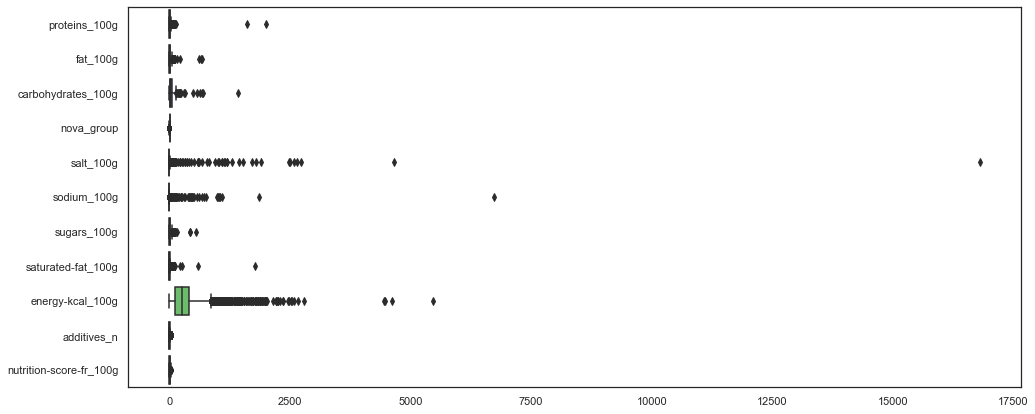

In [62]:
plt.figure(figsize=(16,7))
sns.boxplot(data=df_num, orient='h', palette = 'viridis')

from the boxplot we can spot some clear outliers that need to be removed for further modeling 

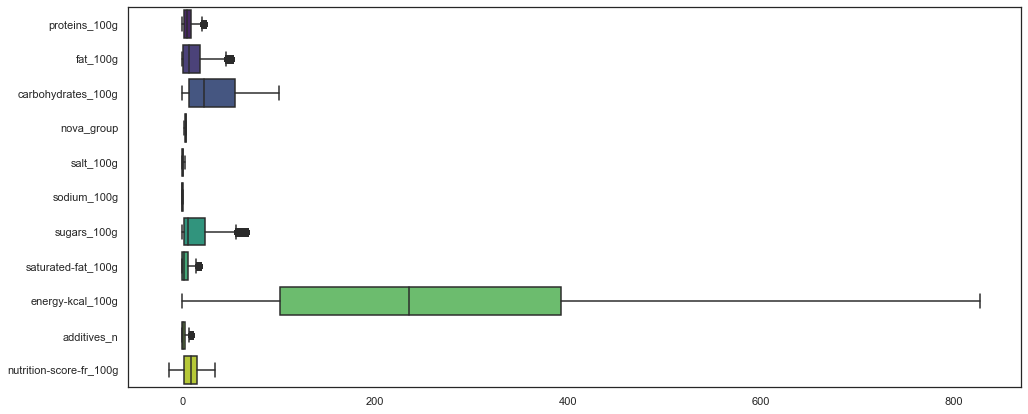

In [81]:
#Remove outliers from ALL of the features

df1 = df_num.copy()

for column in df1:

    if df1[column].dtype != 'object':
        Q1 = df1[column].quantile(.25)
        Q3 = df1[column].quantile(.75) 
        IQR = Q3 - Q1 #interquartile range 
        lower_limit = Q1 - 1.5 * IQR #at what height is the lower whisker, 1.5*IQR is a defualt size of a whisker 
        upper_limit = Q3 + 1.5 * IQR #at what height is the upper whisker 
 
        df1 = df1[(df1[column] >= (lower_limit)) & (df1[column] <= (upper_limit))] 
        
plt.figure(figsize=(16,7))
sns.boxplot(data=df1, orient='h', palette = 'viridis')

In [64]:
df1.shape

(173167, 11)

OutLiersBox(df,df_name[0])

In [65]:
df1.to_csv('nutrition_feat_clean.csv', index=False)
df1.describe()

proteins_100g       fat_100g  carbohydrates_100g     nova_group  \
count  173167.000000  173167.000000        173167.00000  173167.000000   
mean        6.513231      11.104032            31.32358       3.724769   
std         5.711374      11.645317            26.38589       0.453599   
min         0.000000       0.000000             0.00000       2.000000   
25%         2.000000       1.177500             7.20000       3.000000   
50%         5.380000       7.010000            22.80000       4.000000   
75%         9.300000      18.750000            55.30000       4.000000   
max        24.140000      51.720000           100.00000       4.000000   

           salt_100g    sodium_100g    sugars_100g  saturated-fat_100g  \
count  173167.000000  173167.000000  173167.000000       173167.000000   
mean        0.796199       0.318480      14.346311            3.812473   
std         0.697446       0.278981      16.949539            4.751379   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.140000       0.056000       1.640000            0.100000   
50%         0.700000       0.280000       6.250000            1.790000   
75%         1.224280       0.489712      23.200000            6.000000   
max         2.847500       1.139000      67.310000           18.250000   

       energy-kcal_100g    additives_n  nutrition-score-fr_100g  
count     173167.000000  173167.000000            173167.000000  
mean         252.242191       2.226487                 8.850584  
std          165.767222       2.377329                 8.329400  
min            0.000000       0.000000               -14.000000  
25%          101.000000       0.000000                 2.000000  
50%          235.000000       1.000000                 9.000000  
75%          393.000000       3.000000                15.000000  
max          828.000000      10.000000                34.000000

In [66]:
drop_rows_perc = (df_num.shape[0]-df1.shape[0])/df_num.shape[0]*100

print('Shape of the raw dataset:', df_num.shape[0])
print('\nShape of the CLEAN dataset:', df1.shape[0])

print('\nWe lost', df_num.shape[0]-df1.shape[0], 'and we drop the ',round(drop_rows_perc, 4), '% of the data')

Shape of the raw dataset: 250407

Shape of the CLEAN dataset: 173167

We lost 77240 and we drop the  30.8458 % of the data


## Feature Selection
Feature selection is also called variable selection or attribute selection.
It is the automatic selection of attributes in your data (such as columns in tabular data) that are most relevant to the predictive modeling problem you are working on.

Feature selection methods aid you in your mission to create an accurate predictive model. They help you by choosing features that will give you as good or better accuracy whilst requiring less data.

Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant attributes from data that do not contribute to the accuracy of a predictive model or may in fact decrease the accuracy of the model.

### Correlation

In [67]:
df_corr_interest = df1.corr()['nutrition-score-fr_100g']
df_corr_interest = df_corr_interest.sort_values(ascending=False)

In [68]:
print(df_corr_interest[df_corr_interest > 0.5])

nutrition-score-fr_100g    1.000000
saturated-fat_100g         0.710083
energy-kcal_100g           0.661210
fat_100g                   0.612149
sugars_100g                0.533644
Name: nutrition-score-fr_100g, dtype: float64


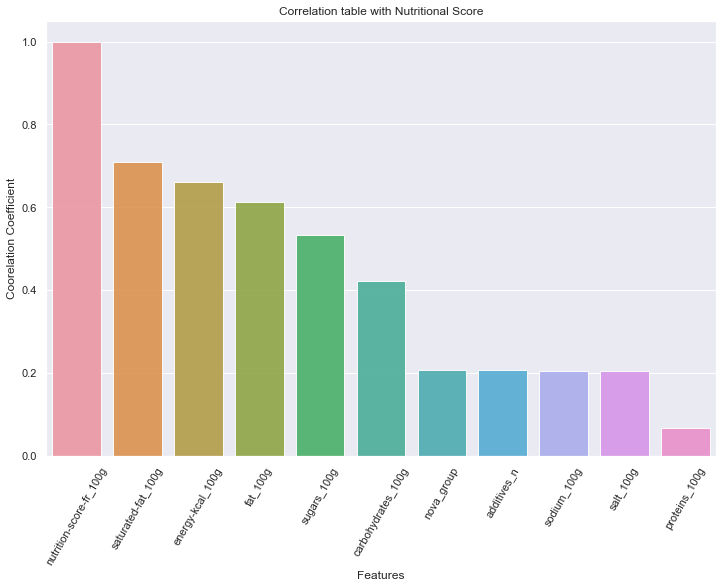

In [69]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

sns.set(style="darkgrid")
chart = sns.barplot(df_corr_interest.index, df_corr_interest.values, alpha=0.9)
plt.title('Correlation table with Nutritional Score')
plt.ylabel('Coorelation Coefficient', fontsize=12)
plt.xlabel('Features', fontsize=12)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)

plt.show()

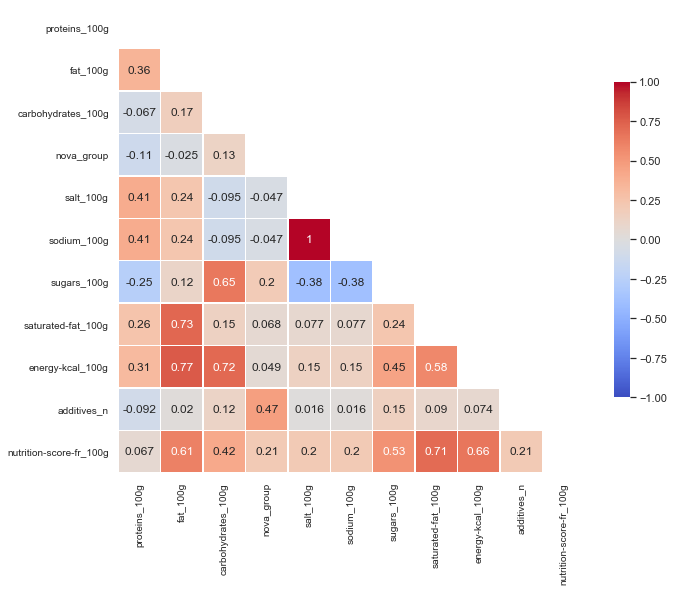

In [70]:
sns.set(style="white")
corr = df1.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))
fig = sns.heatmap(corr, mask=mask, cmap="coolwarm",
            vmin=-1, vmax=1, square=True, center=0,
            linewidths=.5, cbar_kws={"shrink": .5},
           annot=True)
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
plt.tight_layout()
plt.show()

From the correlation map we can see that sodium and salt are very highly correlated.
Therefore, we will drop sodium before building the model, as it does not give it any additional value.

In [84]:
df1.columns

Index(['proteins_100g', 'fat_100g', 'carbohydrates_100g', 'nova_group',
       'salt_100g', 'sodium_100g', 'sugars_100g', 'saturated-fat_100g',
       'energy-kcal_100g', 'additives_n', 'nutrition-score-fr_100g'],
      dtype='object')

In [86]:
df1 = df1.drop('sodium_100g',axis=1)

In [77]:
#let's also save a copy of df without dropping outliers for the additional model 

no_sodium = df[['proteins_100g', 'fat_100g', 'carbohydrates_100g', 'nova_group',
       'salt_100g', 'sugars_100g', 'saturated-fat_100g',
       'energy-kcal_100g', 'additives_n',
       'nutrition-score-fr_100g']].copy()

type(df_num_no_sodium)

pandas.core.frame.DataFrame

In [80]:
no_sodium.to_csv('no_sodium.csv')

### Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

> Selecting features by using tree derived feature importance is a very straightforward, fast and generally accurate way of selecting good features for machine learning. I

In [87]:
# Load libraries

from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [105]:
df1.head()

proteins_100g  fat_100g  carbohydrates_100g  nova_group  salt_100g  \
64            9.50      2.20               25.20         4.0      0.358   
264           0.00      0.00               83.33         3.0      0.000   
318          22.00     12.00               23.00         4.0      2.160   
354           3.33     10.70               38.70         4.0      0.647   
371          10.00      1.11               53.30         3.0      1.520   

     sugars_100g  saturated-fat_100g  energy-kcal_100g  additives_n  \
64          0.60               0.500             160.0          3.0   
264        66.67               0.000             300.0          0.0   
318         0.00               7.000             290.0          3.0   
354        24.70               2.000             260.0          3.0   
371         1.11               0.333             278.0          0.0   

     nutrition-score-fr_100g  
64                      -4.0  
264                      3.0  
318                      6.0  
354                      9.0  
371                      2.0

In [90]:
X =  df1.drop('nutrition-score-fr_100g', axis=1)
y = df1['nutrition-score-fr_100g']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.33,random_state=42)

In [91]:
clf = RandomForestClassifier(n_estimators=550,random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=550,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [92]:
clf.feature_importances_

array([0.12023541, 0.101122  , 0.12119055, 0.0159857 , 0.17557471,
       0.14723046, 0.11849205, 0.14205246, 0.05811665])

In [93]:
feature_importance = clf.feature_importances_

print(feature_importance)

[0.12023541 0.101122   0.12119055 0.0159857  0.17557471 0.14723046
 0.11849205 0.14205246 0.05811665]


In [94]:
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

feature_importance

array([ 68.4810529 ,  57.59485315,  69.02506216,   9.1047853 ,
       100.        ,  83.85630147,  67.48810853,  80.90712782,
        33.10080879])

In [95]:
# Know the index of the variable by it's importancy 
sorted_idx = np.argsort(feature_importance)

print(sorted_idx)
#print(feature_importance)
#print(pos)

[3 8 1 6 0 2 7 5 4]


In [96]:
pos = np.arange(sorted_idx.shape[0]) + .5

pos

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])

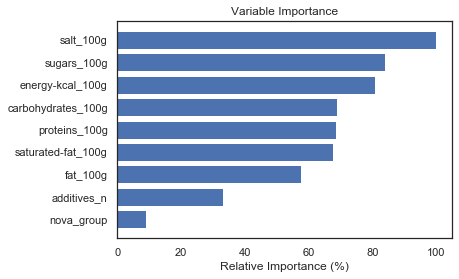

In [98]:
# #############################################################################
# Plot feature importance
# #############################################################################

#plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df1.columns[sorted_idx])
plt.xlabel('Relative Importance (%)')
plt.title('Variable Importance')
plt.show()

In [103]:
df_feature_imp=df[['salt_100g','sugars_100g','energy-kcal_100g',
                   'carbohydrates_100g','proteins_100g','saturated-fat_100g','fat_100g','nutrition-score-fr_100g']]

In [104]:
df_feature_imp.to_csv('Filtered_nutrition_dataset.csv')